**Exlporatory Data Analysis** (EDA)

Setup & Data Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the training data
train_path = '/Users/evatoledano/ML 2/project/train.csv'
train = pd.read_csv(train_path)

# load the testing data
test_path = '/Users/evatoledano/ML 2/project/test-full.csv'
test = pd.read_csv(test_path)

In [3]:
print(train.shape)
print(test.shape)

(15120, 56)
(581012, 55)


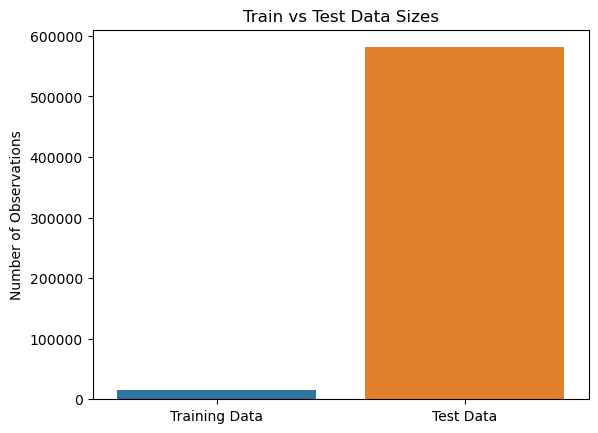

In [4]:
# Compare the number of observations in test versus train data
train_size = train.shape[0]  
test_size = test.shape[0]    

# Data to plot
sizes = [train_size, test_size]
labels = ['Training Data', 'Test Data']

sns.barplot(x=labels, y=sizes)
plt.title('Train vs Test Data Sizes')
plt.ylabel('Number of Observations')
plt.show()

**Data Exploration**

Our dataset is composed of 1 target variable and 54 features, both categorical and numerical:

Numerical features:
- **Elevation**, quantitative (meters): Elevation in meters
- **Aspect**, quantitative (azimuth): Aspect in degrees azimuth
- **Slope**, quantitative (degrees): Slope in degrees
- **Horizontal_Distance_To_Hydrology**, quantitative (meters): Horz Dist to nearest surface water features
- **Vertical_Distance_To_Hydrology**, quantitative (meters): Vert Dist to nearest surface water features
- **Horizontal_Distance_To_Roadways**, quantitative (meters ): Horz Dist to nearest roadway
- **Hillshade_9am**, quantitative (0 to 255 index): Hillshade index at 9am, summer solstice
- **Hillshade_Noon**, quantitative (0 to 255 index): Hillshade index at noon, summer soltice
- **Hillshade_3pm**, quantitative (0 to 255 index): Hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points**, quantitative (meters): Horz Dist to nearest wildfire ignition points

Categorical features:
- **Wilderness_Area** (4 binary columns), qualitative (0 (absence) or 1 (presence)): Wilderness area designation
- **Soil_Type** (40 binary columns), qualitative (0 (absence) or 1 (presence)): Soil Type designation

Target:
- **Cover_Type** (7 types), integer (1 to 7): Forest Cover Type designation <br><br><br>



The target variable (cover_type) is categorical and includes 7 possibilities:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz <br><br><br>



From the code below, we find that our target feature is perfectly balanced in the training data. 

In [10]:
train['Cover_Type'].describe()

count    15120.000000
mean         4.000000
std          2.000066
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: Cover_Type, dtype: float64

1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64


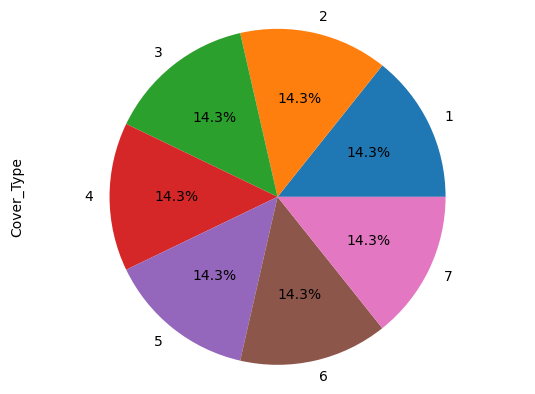

In [11]:
print(train['Cover_Type'].value_counts())

# show proportion of the cover types
train['Cover_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()


There are no missing values, and all the values types are integers so no additional pre-processing is required at this stage.

In [5]:
train.head(10)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,...,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,...,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,...,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,...,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,...,0,0,0,0,0,0,0,0,0,1
5,323208,2772,29,11,90,4,808,216,216,134,...,0,0,0,0,0,0,0,0,0,1
6,435941,2998,346,9,108,3,2648,203,226,161,...,0,0,0,0,0,0,0,0,0,1
7,45138,3214,56,10,488,59,4522,227,218,124,...,0,0,0,0,0,0,0,0,0,1
8,68790,3123,54,13,210,17,3278,227,211,114,...,0,0,0,0,0,0,0,0,0,1
9,62018,2972,12,15,365,69,4392,204,209,140,...,0,0,0,0,0,0,0,0,0,1


In [6]:
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

In [8]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,...,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,...,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,398150.250000,3109.000000,257.000000,22.000000,330.000000,80.000000,2292.000000,236.000000,235.000000,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,581005.000000,3850.000000,360.000000,50.000000,1376.000000,570.000000,6803.000000,254.000000,254.000000,251.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


### Feature Exploration / Train data

**Distribution**

Visualization of the distribution of numerical variables

<Figure size 10000x7000 with 0 Axes>

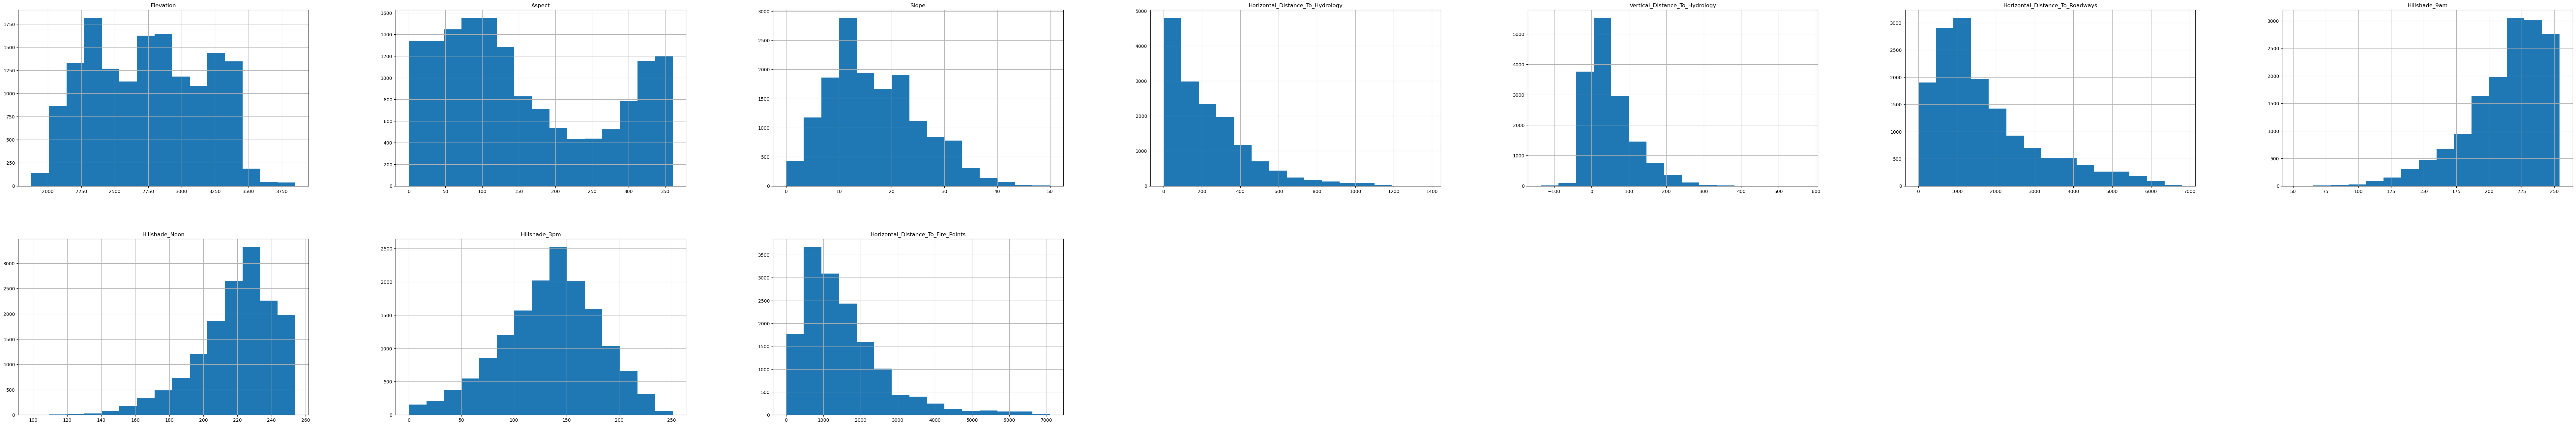

<Figure size 10000x7000 with 0 Axes>

In [12]:
var = train[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

var.hist(bins=15, figsize=(100, 70), layout=(8, 7))

plt.figure(figsize=(100, 70))

Distribution density graphs for a series of numerical variables, according to different types of forest cover (Cover_Type). 

/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_39441/330347118.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_39441/330347118.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_39441/330347118.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
/var/folders/0c/xx2cx7ns17s2__43rmj5_qnr0000gn/T/ipykernel_39441/33

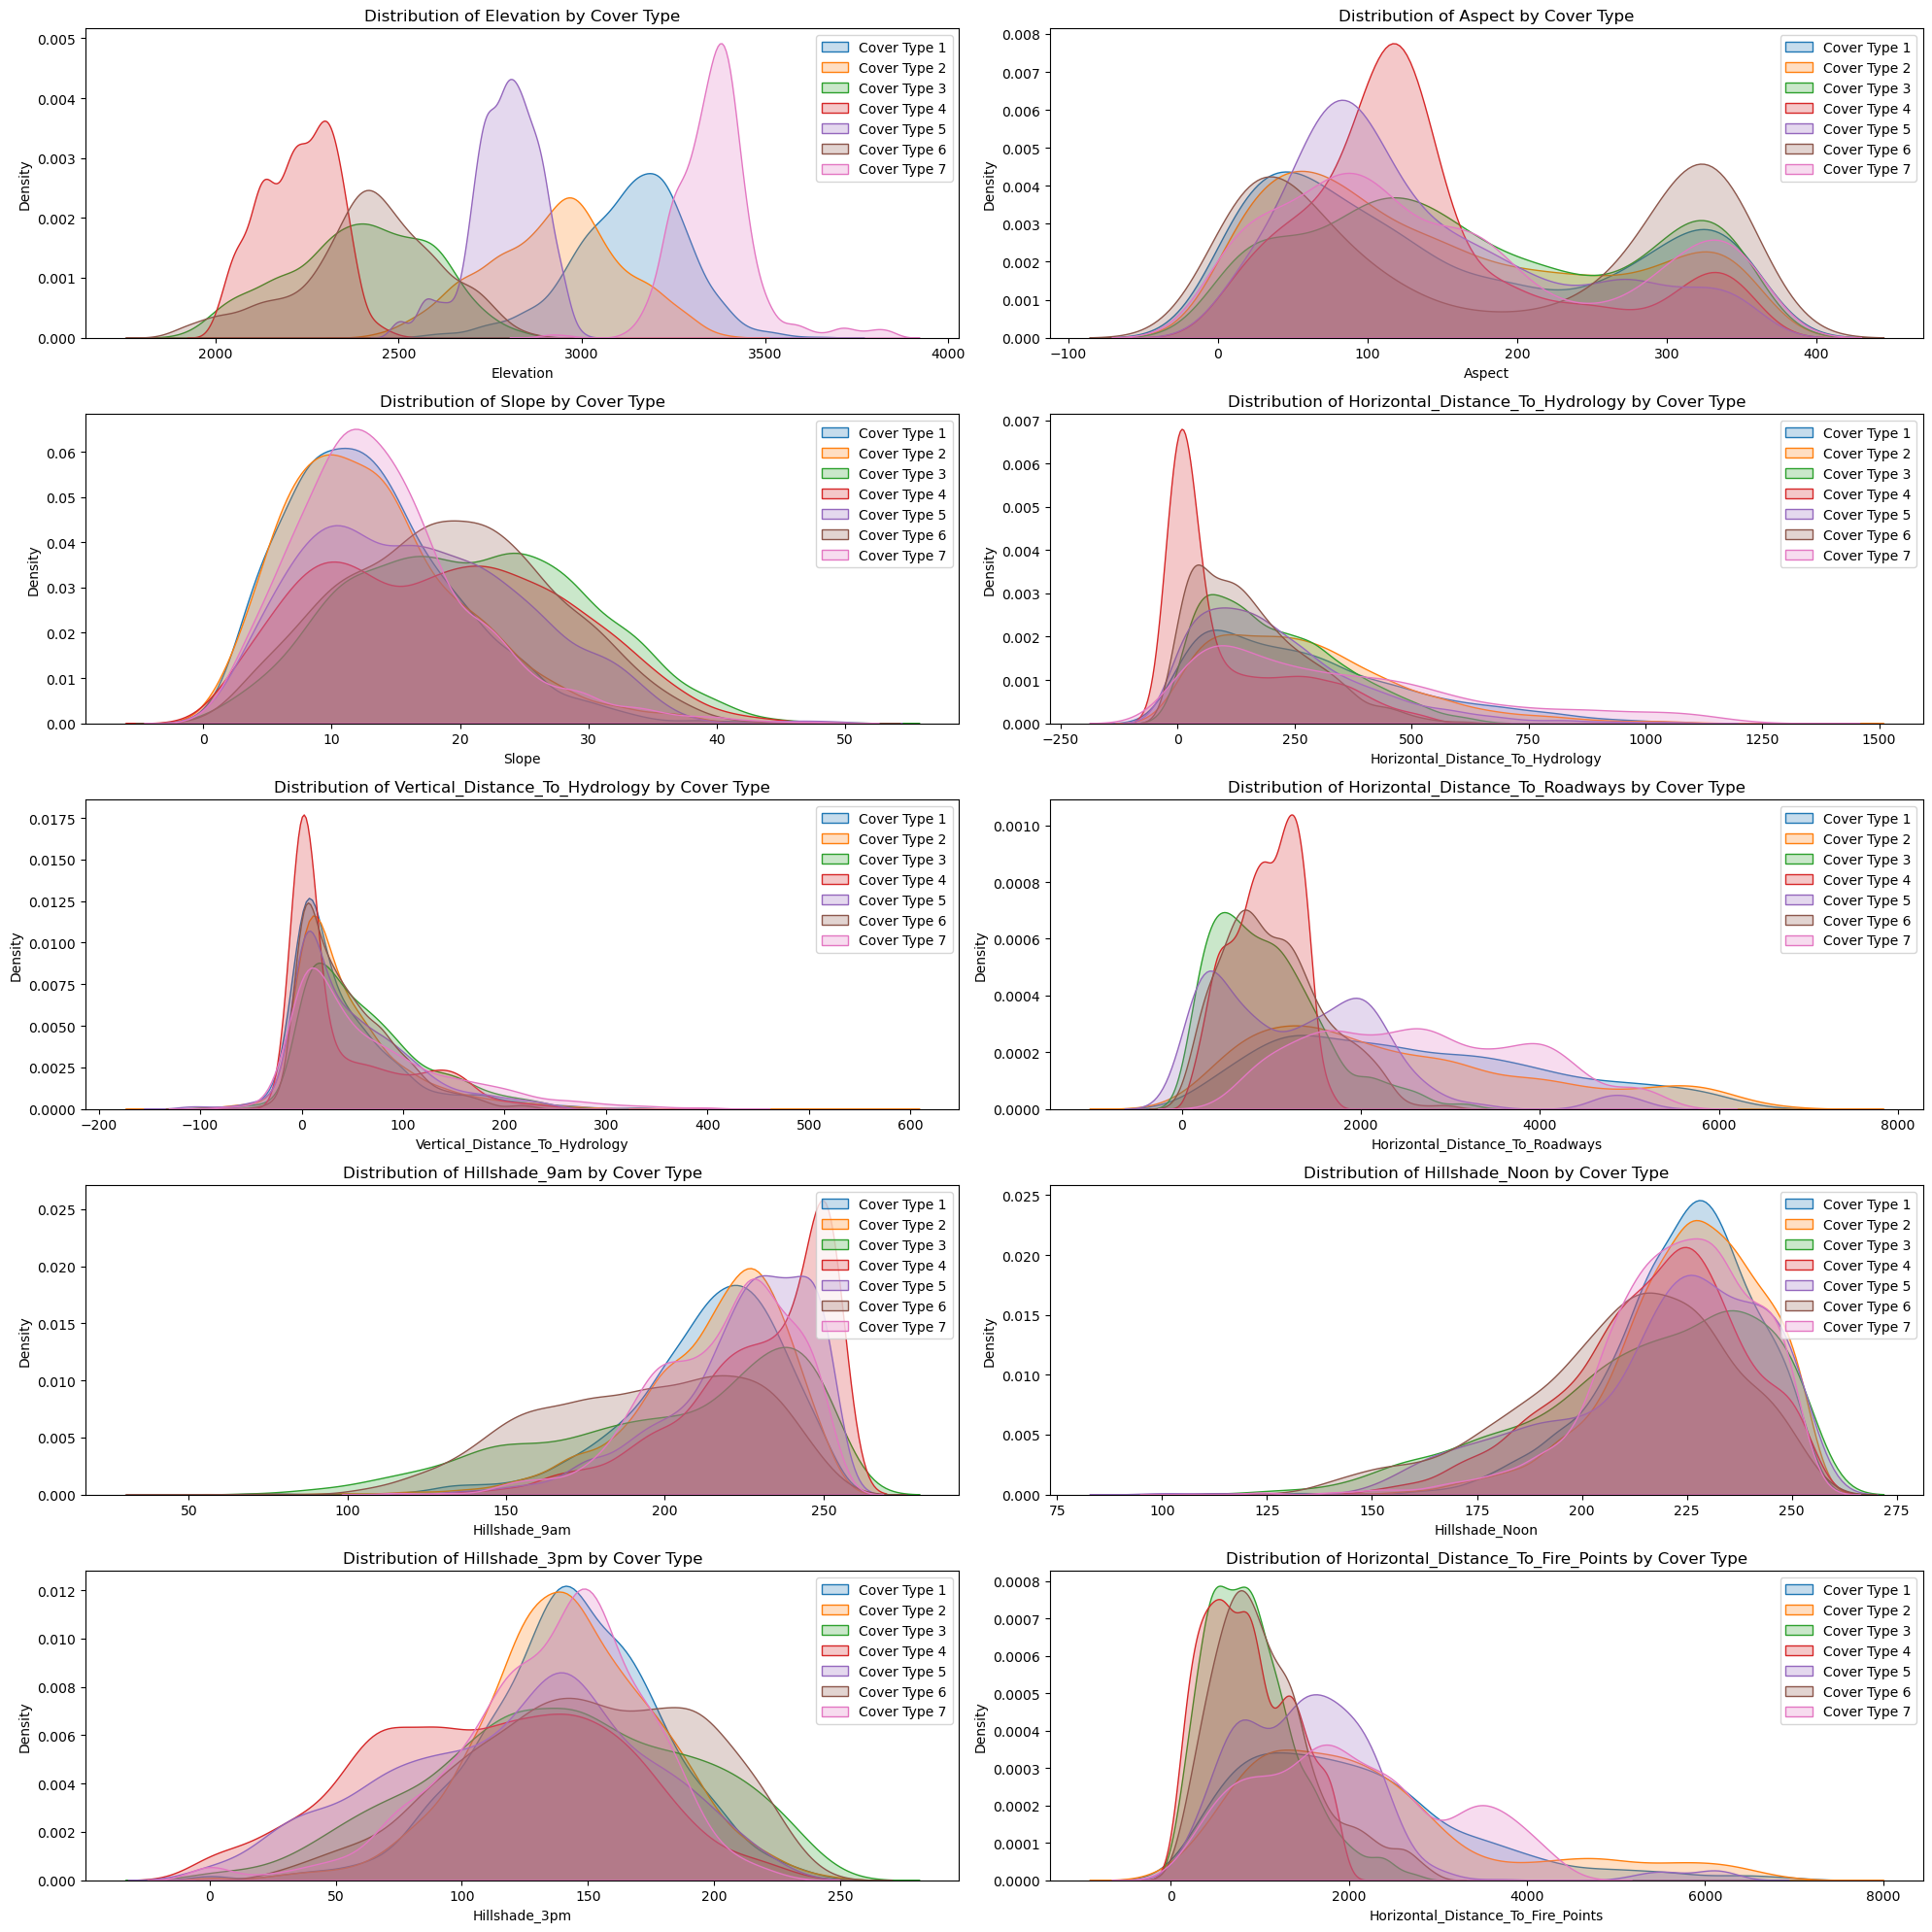

In [13]:
variables = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
             'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
             'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
             'Horizontal_Distance_To_Fire_Points']


plt.figure(figsize=(20, 20))

for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)
    for cover_type in train['Cover_Type'].unique():
        subset = train[train['Cover_Type'] == cover_type]
        sns.kdeplot(subset[var], label=f'Cover Type {cover_type}', shade=True)
    plt.title(f'Distribution of {var} by Cover Type')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()

Cover type 1: Spruce/Fir

Cover type 2: Lodgepole Pine

Cover type 3: Ponderosa Pine

Cover type 4: Cottonwood/Willow

Cover type 5: Aspen

Cover type 6: Douglas-fir

Cover type 7: Krummholz <br><br><br>

**Check Anomalies & outliers**

In [14]:
train['Vertical_Distance_To_Hydrology']

0         54
1        -16
2          2
3         60
4         26
        ... 
15115     12
15116     92
15117    113
15118     52
15119     76
Name: Vertical_Distance_To_Hydrology, Length: 15120, dtype: int64

We notice that there are negative values in the Vertical_Distance_To_Hydrology column, which may seem strange at first, but on reflection the negative values could indicate that the nearest surface water is either below this data point or below sea level.
So, this values make sense, and we can keep it.

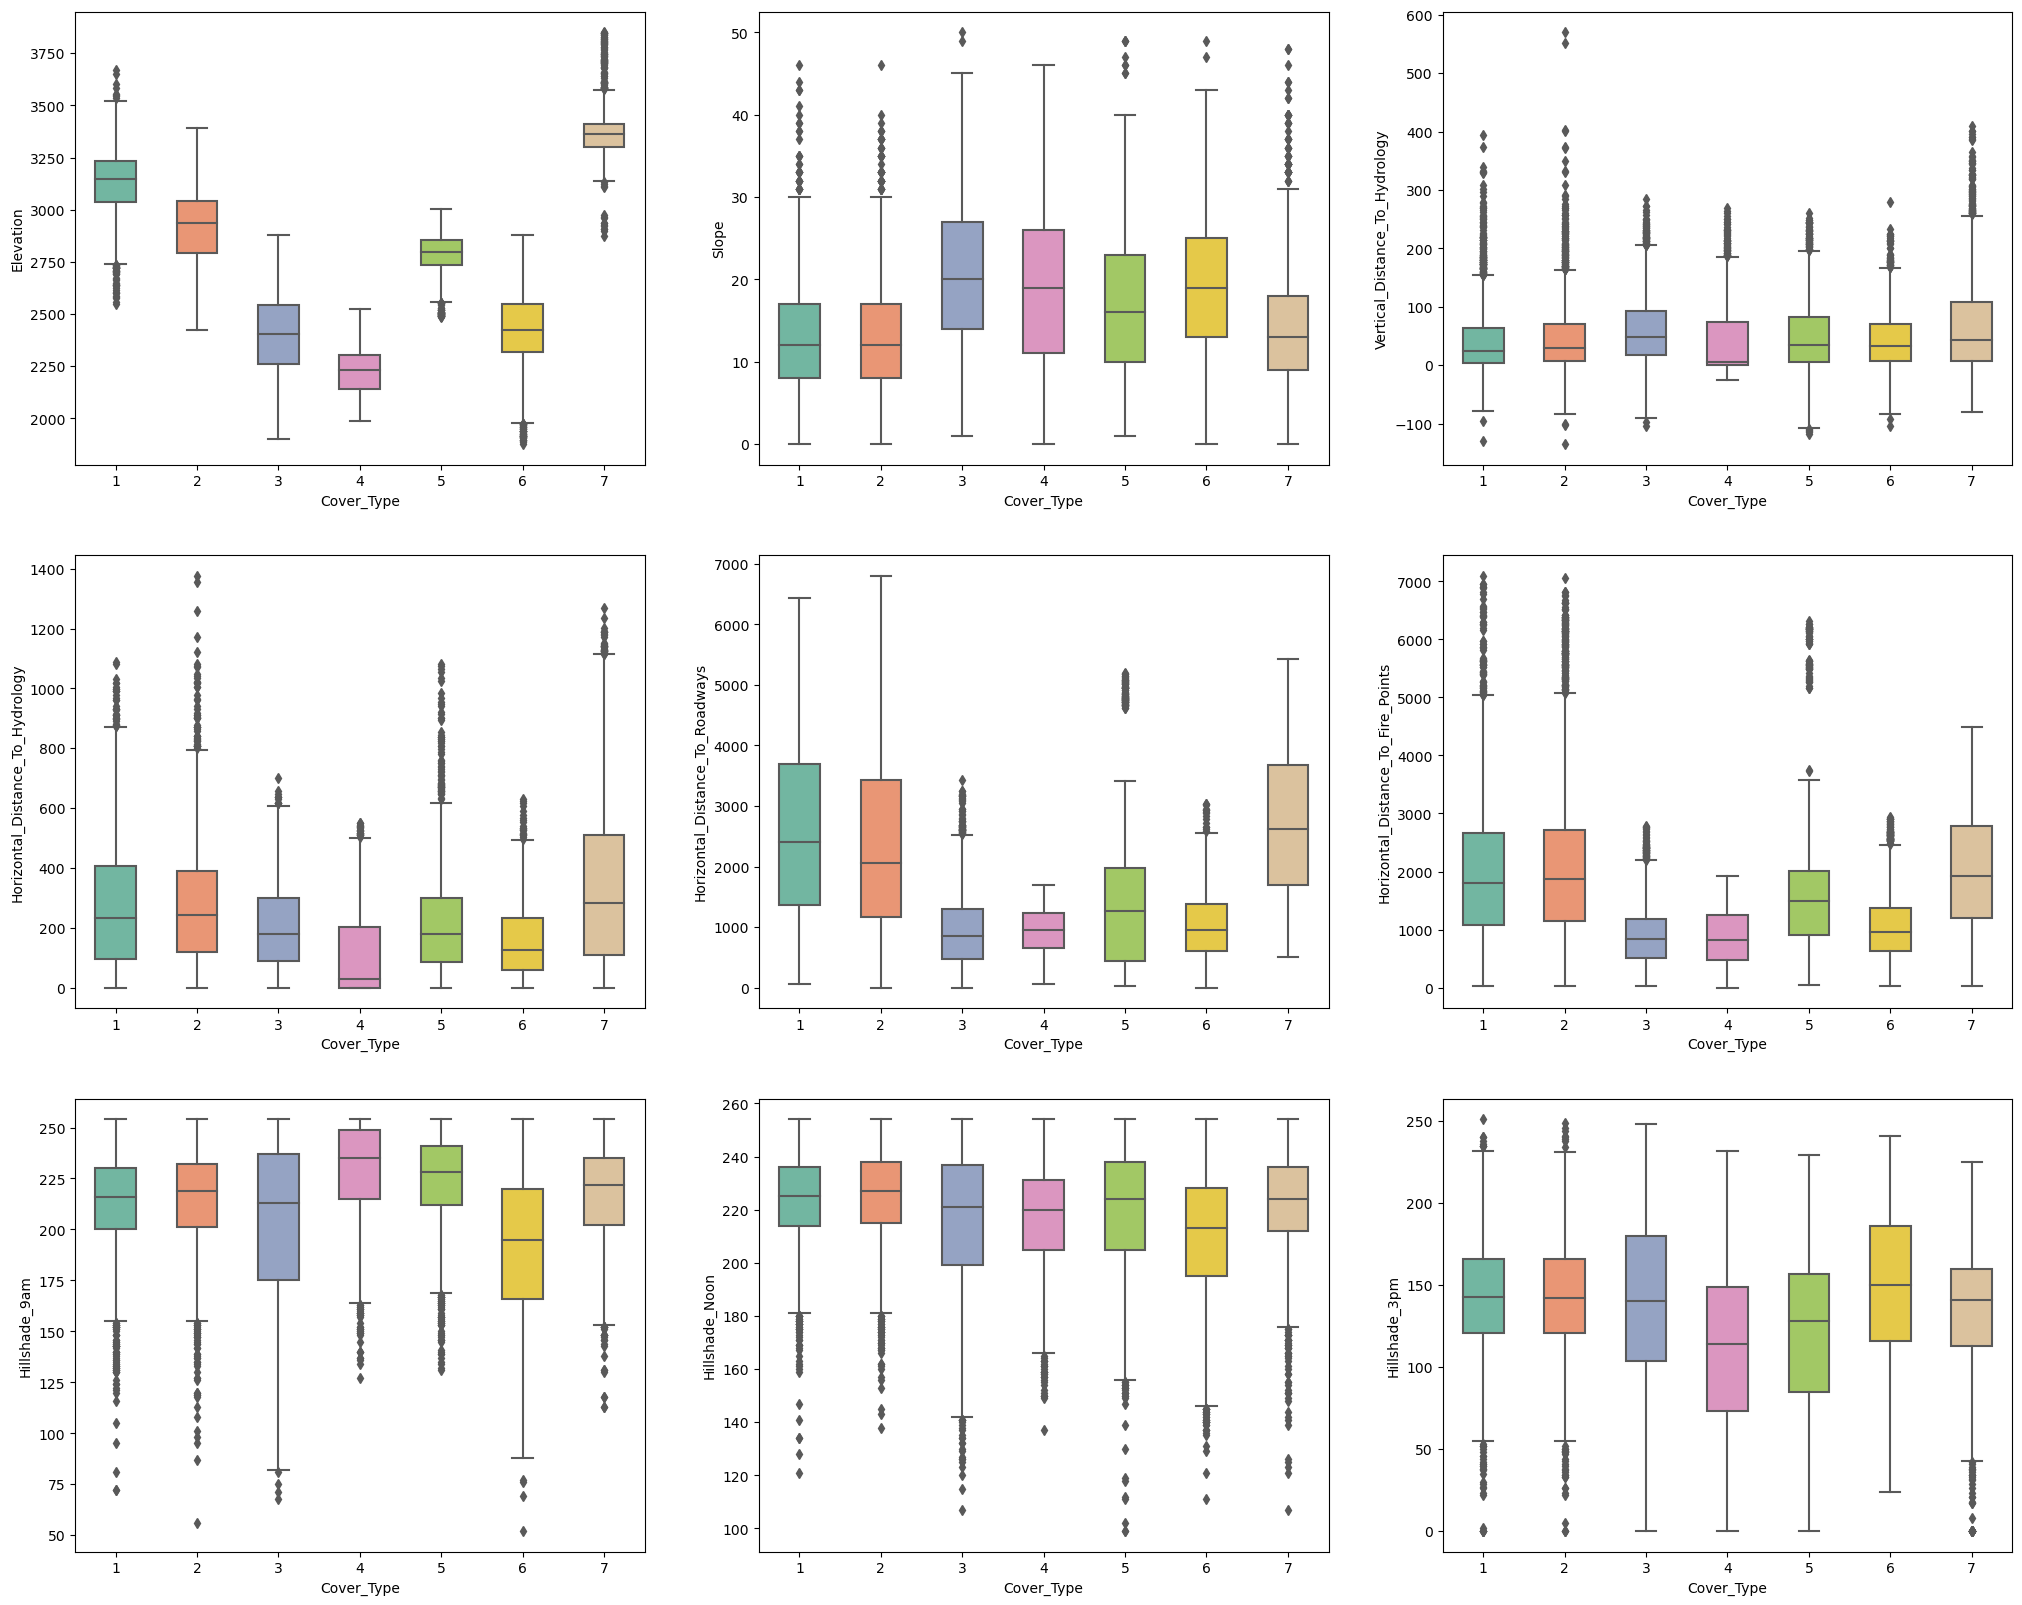

In [15]:
cmap = sns.color_palette("Set2")

def boxplot(f_feature, s_feature):
    sns.boxplot(x=f_feature, y=s_feature, data=train, palette=cmap, width=0.5);

f = plt.figure(figsize=(25,20))
f.add_subplot(331)
boxplot('Cover_Type','Elevation')
f.add_subplot(332)
boxplot('Cover_Type','Slope')
f.add_subplot(333)
boxplot('Cover_Type','Vertical_Distance_To_Hydrology')
f.add_subplot(334)
boxplot('Cover_Type','Horizontal_Distance_To_Hydrology')
f.add_subplot(335)
boxplot('Cover_Type','Horizontal_Distance_To_Roadways')
f.add_subplot(336)
boxplot('Cover_Type','Horizontal_Distance_To_Fire_Points')
f.add_subplot(337)
boxplot('Cover_Type','Hillshade_9am')
f.add_subplot(338)
boxplot('Cover_Type','Hillshade_Noon')
f.add_subplot(339)
boxplot('Cover_Type','Hillshade_3pm')


**Correlations**

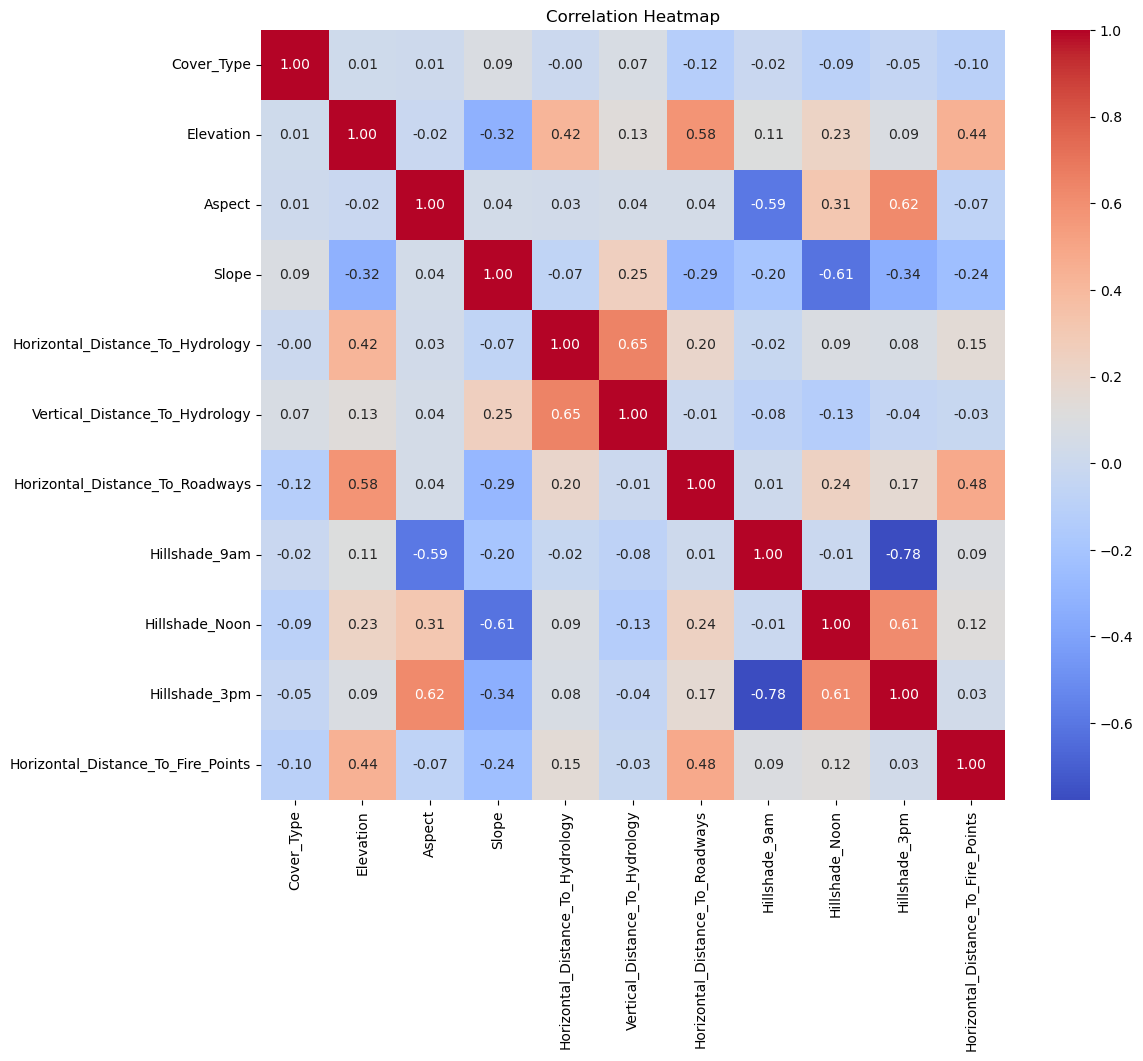

In [16]:
selected_columns = ['Cover_Type', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 
                    'Horizontal_Distance_To_Fire_Points']
selected_data = train[selected_columns]

correlations = selected_data.corr()

plt.figure(figsize=(12, 10))  # Ajuster la taille selon vos besoins
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

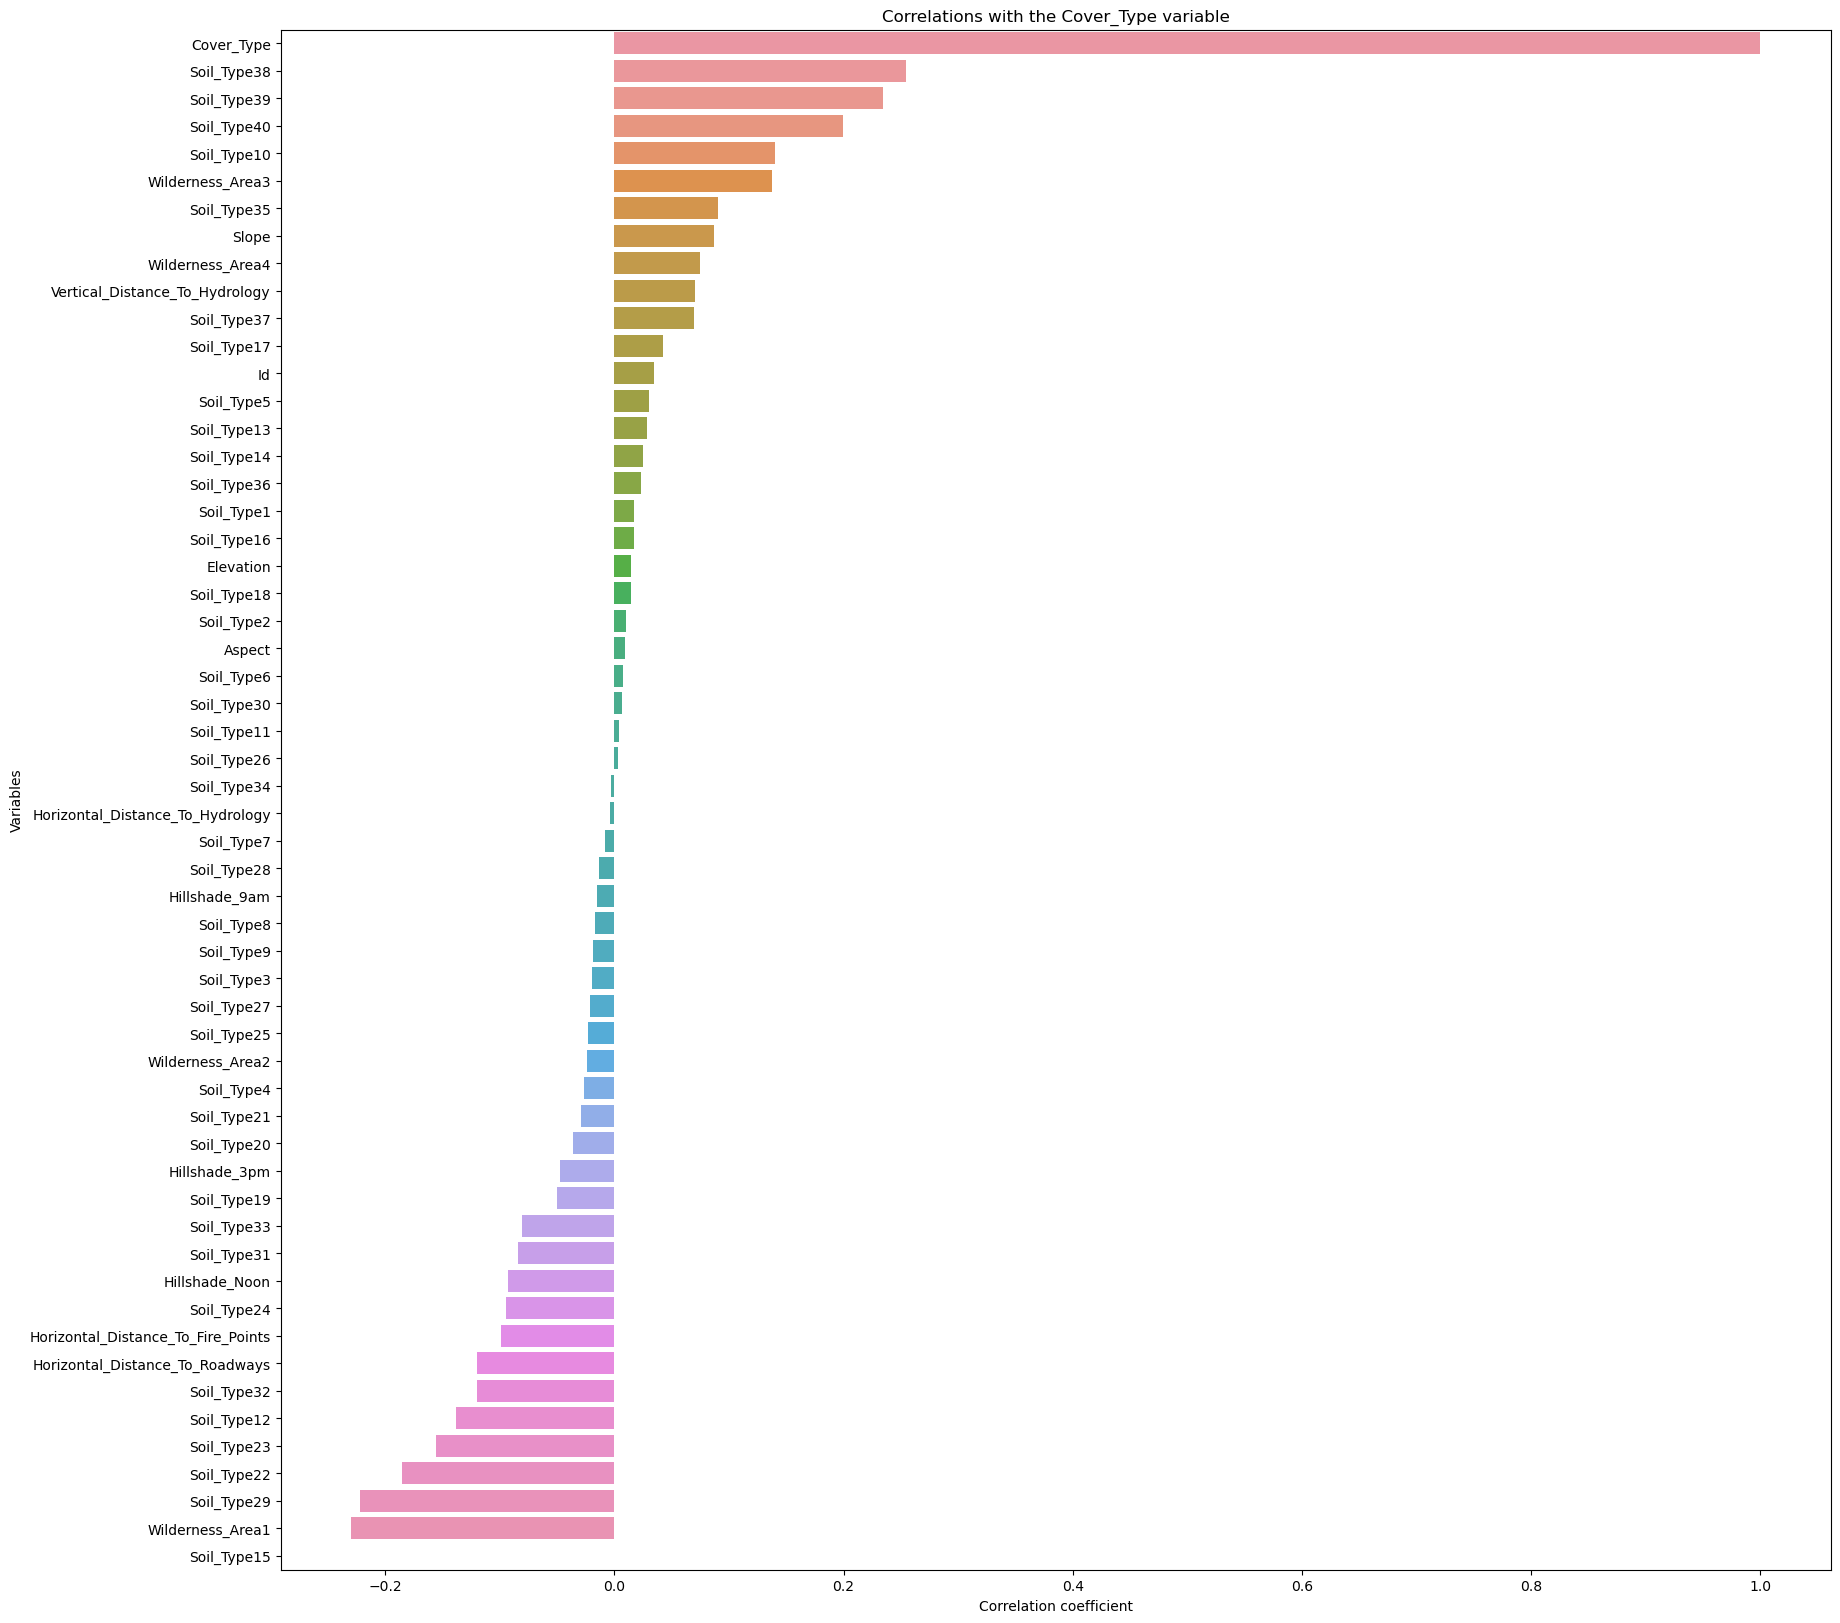

In [17]:
#Correlations with the Cover_Type variable
correlations_target = train.corrwith(train['Cover_Type']).sort_values(ascending=False)
plt.figure(figsize=(20,20)) 
sns.barplot(x=correlations_target.values, y=correlations_target.index)


plt.title('Correlations with the Cover_Type variable')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variables')
plt.show()

**Observations**

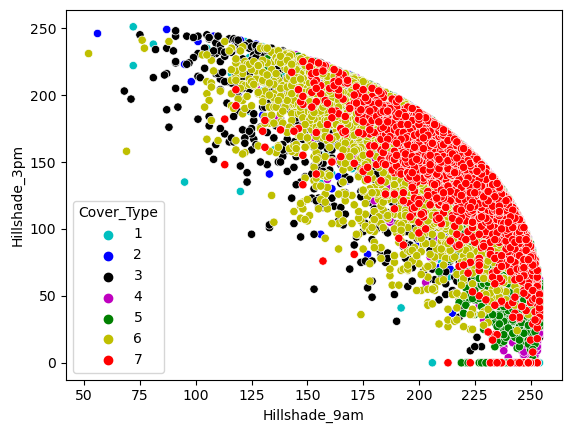

In [18]:
color = ["c", "b", "k", "m", "g", "y", "r"]

sns.scatterplot(
    x="Hillshade_9am",
    y="Hillshade_3pm",
    hue="Cover_Type",
    data=train,
    palette=color,
)
plt.show()

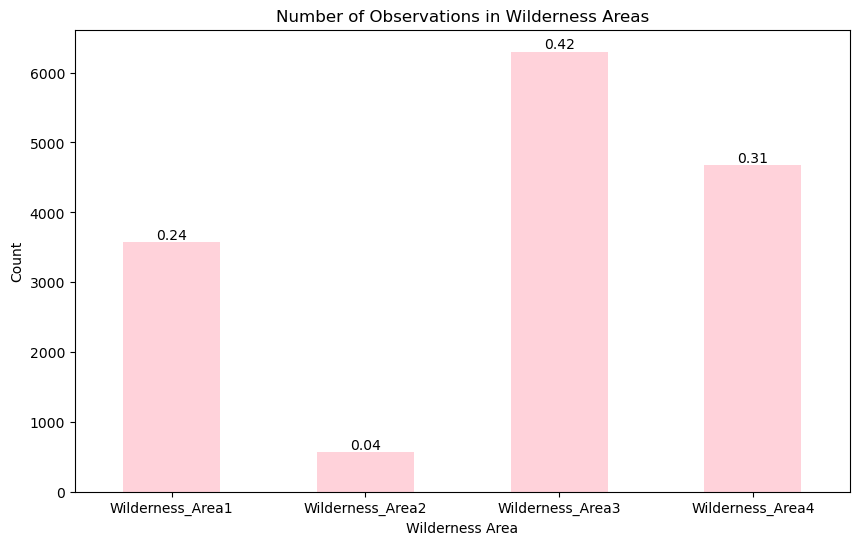

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



wilderness_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


wilderness_counts = train[wilderness_columns].sum()


wilderness_ratios = wilderness_counts / len(train)


wilderness_df = pd.DataFrame({'Count': wilderness_counts, 'Ratio': wilderness_ratios})


ax = wilderness_df['Count'].plot(kind='bar', color='pink', figsize=(10, 6), alpha=0.7)


for i, ratio in enumerate(wilderness_df['Ratio']):
    ax.text(i, wilderness_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations in Wilderness Areas')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.xticks(rotation=0)  


plt.show()

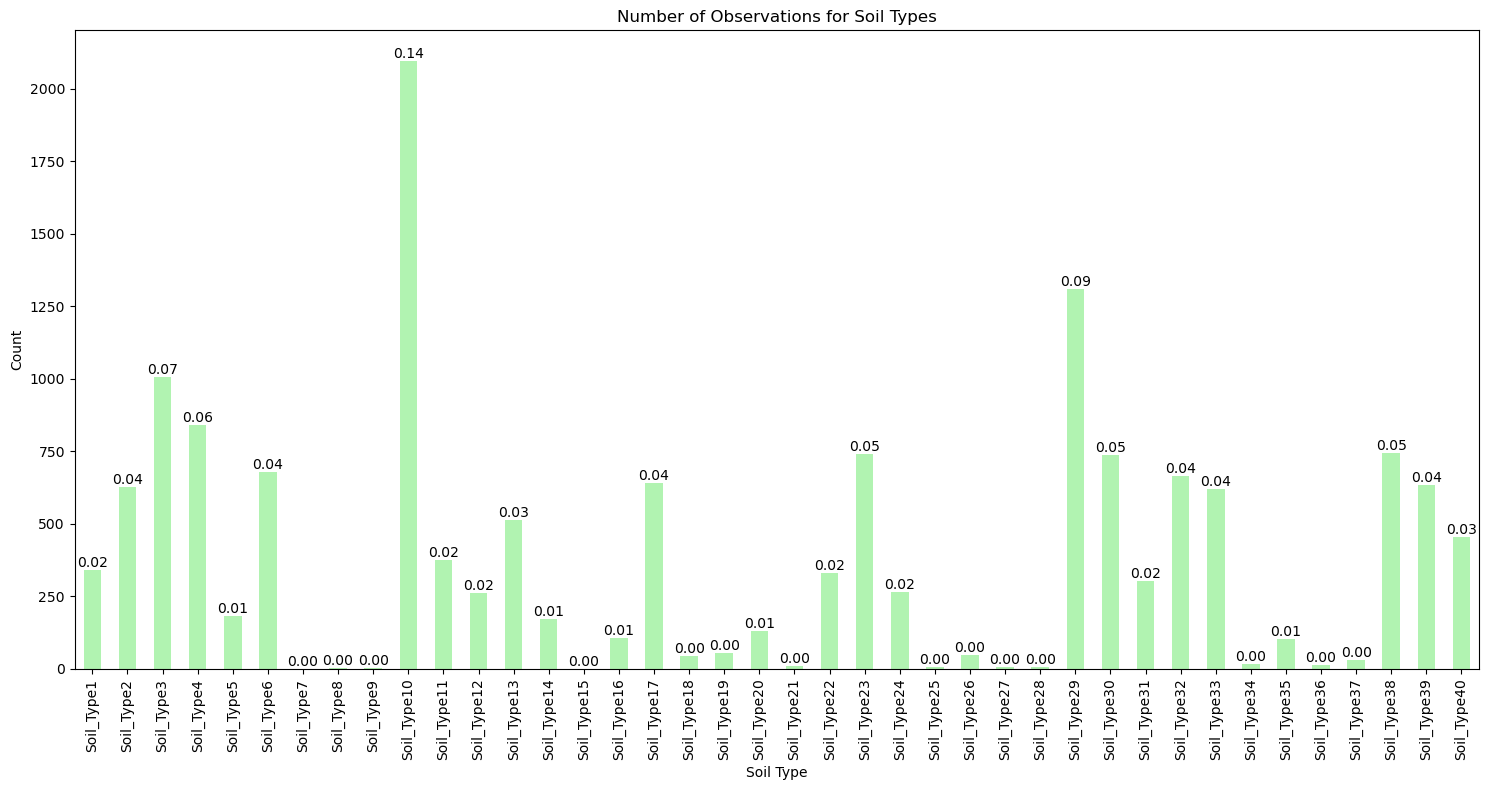

In [20]:
soil_type_columns = [f'Soil_Type{i}' for i in range(1, 41)]


soil_type_counts = train[soil_type_columns].sum()


soil_type_ratios = soil_type_counts / len(train)


soil_type_df = pd.DataFrame({'Count': soil_type_counts, 'Ratio': soil_type_ratios})


ax = soil_type_df['Count'].plot(kind='bar', color='lightgreen', figsize=(15, 8), alpha=0.7)


for i, ratio in enumerate(soil_type_df['Ratio']):
    ax.text(i, soil_type_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations for Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  


plt.tight_layout()  
plt.show()

In [21]:
def climates(X: pd.DataFrame, drop_original: bool = False) -> pd.DataFrame:
    """
    This function aggregates the second digit of the USFS Ecological Landtype Units which
    encodes the following climatic zones:
        1: lower montane dry
        2: lower montane
        3: montane dry
        4: montane
        5: montane dry and montane
        6: montane and subalpine
        7: subalpine
        8: alpine
    The 'Id' column is preserved and reattached if present.
    
    Parameters:
    - X: pd.DataFrame - The input DataFrame.
    - drop_original: bool - Whether to drop the original soil type columns.
    
    Returns:
    - pd.DataFrame - The DataFrame with climatic zone columns added (and potentially soil type columns removed),
      with the 'Id' column reattached (if it was present).
    """
    X = X.copy()  # Modify a copy of X to avoid changing the original DataFrame
    
    # Store the 'Id' column if it exists, then remove it temporarily
    if 'Id' in X.columns:
        Id_col = X['Id'].copy()
        X.drop(columns=['Id'], inplace=True)
    else:
        Id_col = None

    # Climatic Zones aggregation based on soil types
    X["Clim2"] = X.loc[:, X.columns.str.contains("^Soil_Type[1-6]$")].max(axis=1)
    X["Clim3"] = X.loc[:, X.columns.str.contains("^Soil_Type[78]$")].max(axis=1)
    X["Clim4"] = X.loc[:, X.columns.str.contains("^Soil_Type[1][0-3]$|Soil_Type9")].max(axis=1)
    X["Clim5"] = X.loc[:, X.columns.str.contains("^Soil_Type[1][45]$")].max(axis=1)
    X["Clim6"] = X.loc[:, X.columns.str.contains("^Soil_Type[1][678]$")].max(axis=1)
    X["Clim7"] = X.loc[:, X.columns.str.contains("^Soil_Type19$|^Soil_Type[2][0-9]$|^Soil_Type[3][0-4]$")].max(axis=1)
    X["Clim8"] = X.loc[:, X.columns.str.contains("^Soil_Type[3][56789]$|Soil_Type40")].max(axis=1)

    # Drop original soil type columns if requested
    if drop_original:
        cols_to_drop = list(X.columns[X.columns.str.contains("^Soil_Type[0-9][0-9]$|^Soil_Type[0-9]$")])
        X = X.drop(columns=cols_to_drop)
    
    # Reattach the 'Id' column if it was present
    if Id_col is not None:
        X = pd.concat([Id_col.reset_index(drop=True), X], axis=1)
    
    return X

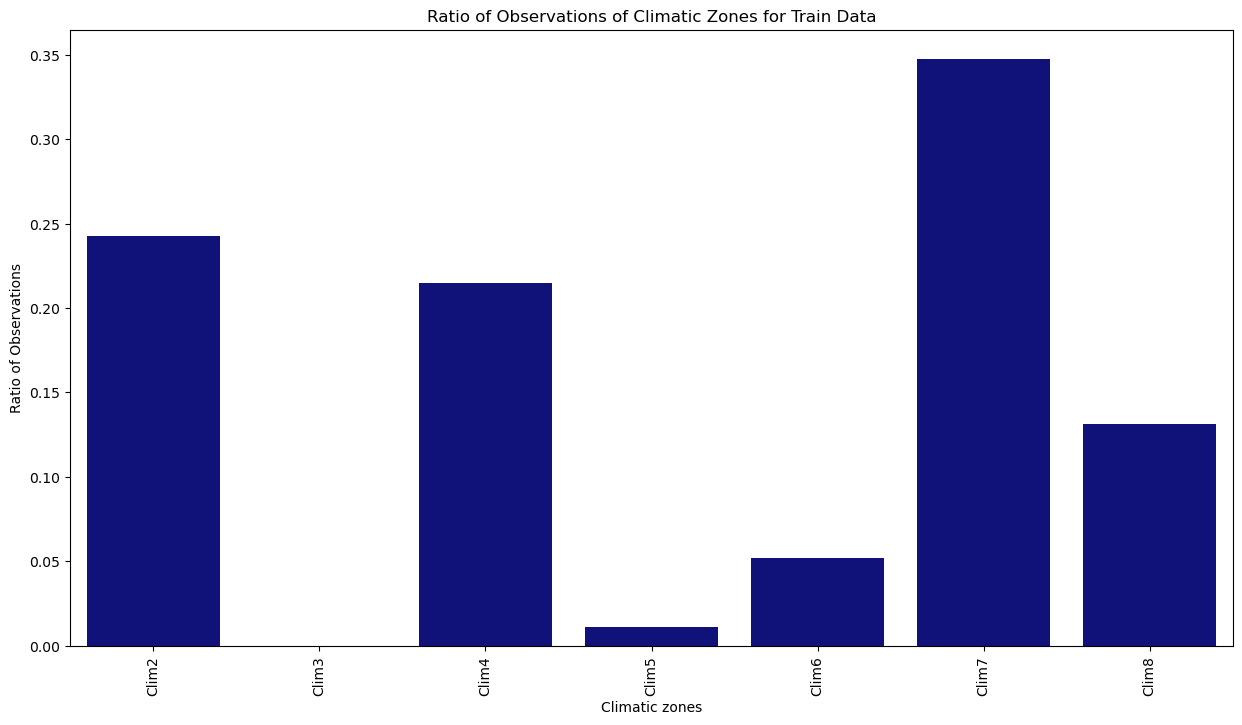

In [22]:
climates_train = climates(train[soil_type_columns], drop_original=True)

# Calculate the sum of each climatic column.
climatic_counts = climates_train.sum()

# Convert accounts into ratios in relation to total observations.
climatic_ratios = climatic_counts / train.shape[0]

# Create a DataFrame for key figures.
climatic_df = pd.DataFrame({'ClimaticZone': climatic_ratios.index, 'Ratio': climatic_ratios.values})

# Draw the ratio graph with seaborn's barplot.
plt.figure(figsize=(15, 8))
sns.barplot(data=climatic_df, x='ClimaticZone', y='Ratio', color='darkblue')
plt.title("Ratio of Observations of Climatic Zones for Train Data")
plt.xlabel("Climatic zones")
plt.ylabel("Ratio of Observations")
plt.xticks(rotation=90)
plt.show()

In [23]:
def geologic_zone(X: pd.DataFrame, drop_original: bool = False) -> pd.DataFrame:
    
    """
    The geologic_zone function takes a DataFrame X and a drop_original argument.
    It creates columns Geo1, Geo2, Geo3 and Geo4 for each group of soil types, representing different geologic zones 
    (1: alluvium,2: glacial,3: mixed sedimentary,4: igneous and metamorphic)
    Each new column is calculated using .max(axis=1), which means it will be 1 if at least one of the soil type conditions is met, otherwise 0.
    """
    
    X = X.copy()  

    # Aggregation of geological zones
    X["Geo1"] = X.loc[:, X.columns.str.contains("^Soil_Type[1][45679]$|^Soil_Type[2][01]$")].max(axis=1)
    X["Geo2"] = X.loc[:, X.columns.str.contains("^Soil_Type[9]$|^Soil_Type[2][23]$")].max(axis=1)
    X["Geo3"] = X.loc[:, X.columns.str.contains("^Soil_Type[7-8]$")].max(axis=1)
    X["Geo4"] = X.loc[:, X.columns.str.contains(
        "^Soil_Type[1-6]$|^Soil_Type[1][01238]$|^Soil_Type[3-4]\\d$|^Soil_Type[2][4-9]$")].max(axis=1)

    # Delete original floor type columns if requested
    if drop_original:
        soil_type_cols = list(X.columns[X.columns.str.contains("^Soil_Type[0-9][0-9]$|^Soil_Type[0-9]$")])
        X = X.drop(columns=soil_type_cols)

    return X

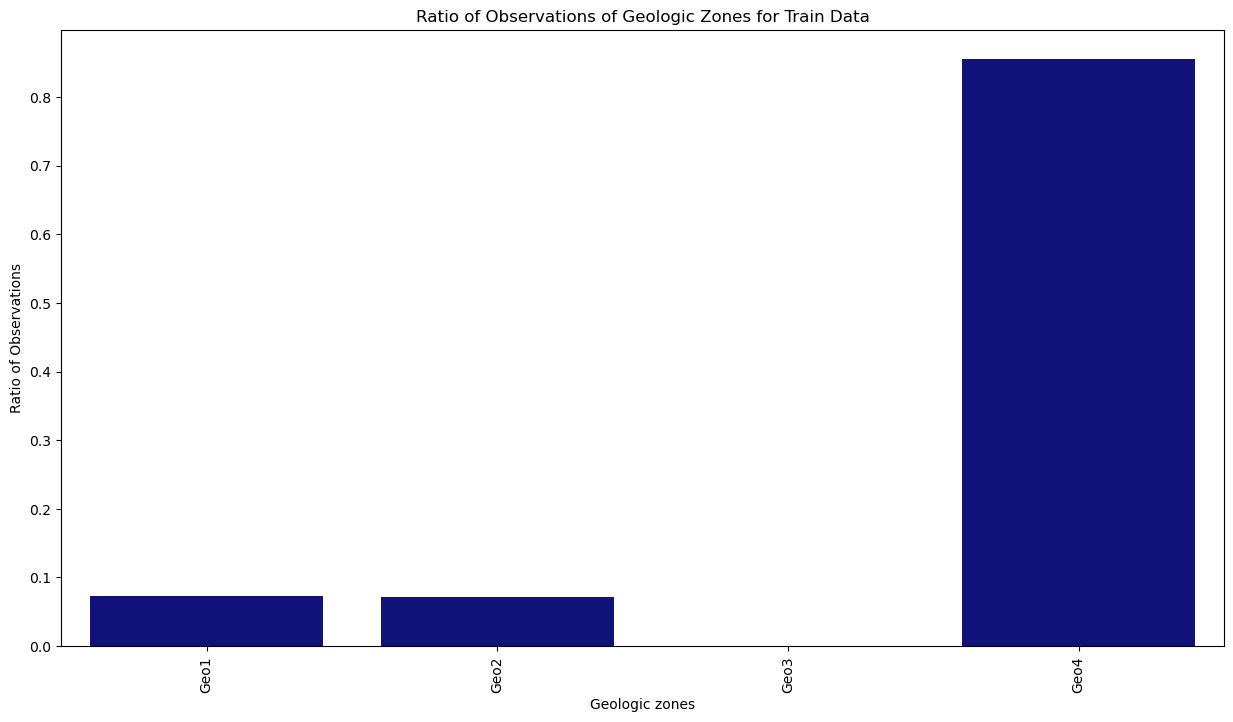

In [24]:
soil_type_columns = [col for col in train.columns if 'Soil_Type' in col]
geologic_zones_train = geologic_zone(train[soil_type_columns], drop_original=True)

# Calculate the sum of each geological column to get the total observations per geological zone
geologic_counts = geologic_zones_train.sum()

# Convert the counts to ratios relative to the total number of observations
geologic_ratios = geologic_counts / train.shape[0]

# Create a DataFrame from the ratios for easier plotting
geologic_df = pd.DataFrame({'GeologicZone': geologic_ratios.index, 'Ratio': geologic_ratios.values})

# Now plot the ratios using seaborn's barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=geologic_df, x='GeologicZone', y='Ratio', color='darkblue')
plt.title("Ratio of Observations of Geologic Zones for Train Data")
plt.xlabel("Geologic zones")
plt.ylabel("Ratio of Observations")
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.show()

**Test Data**

In [26]:
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,0
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,0
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,0
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,0
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,0


In [27]:
test.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,290506.500000,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,167723.861638,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1.000000,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145253.750000,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,290506.500000,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,435759.250000,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,581012.000000,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Id                                  581012 non-null  int64
 1   Elevation                           581012 non-null  int64
 2   Aspect                              581012 non-null  int64
 3   Slope                               581012 non-null  int64
 4   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 5   Vertical_Distance_To_Hydrology      581012 non-null  int64
 6   Horizontal_Distance_To_Roadways     581012 non-null  int64
 7   Hillshade_9am                       581012 non-null  int64
 8   Hillshade_Noon                      581012 non-null  int64
 9   Hillshade_3pm                       581012 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 11  Wilderness_Area1                    581012 non-null 

Visualization of the distribution of numerical variables

<Figure size 10000x7000 with 0 Axes>

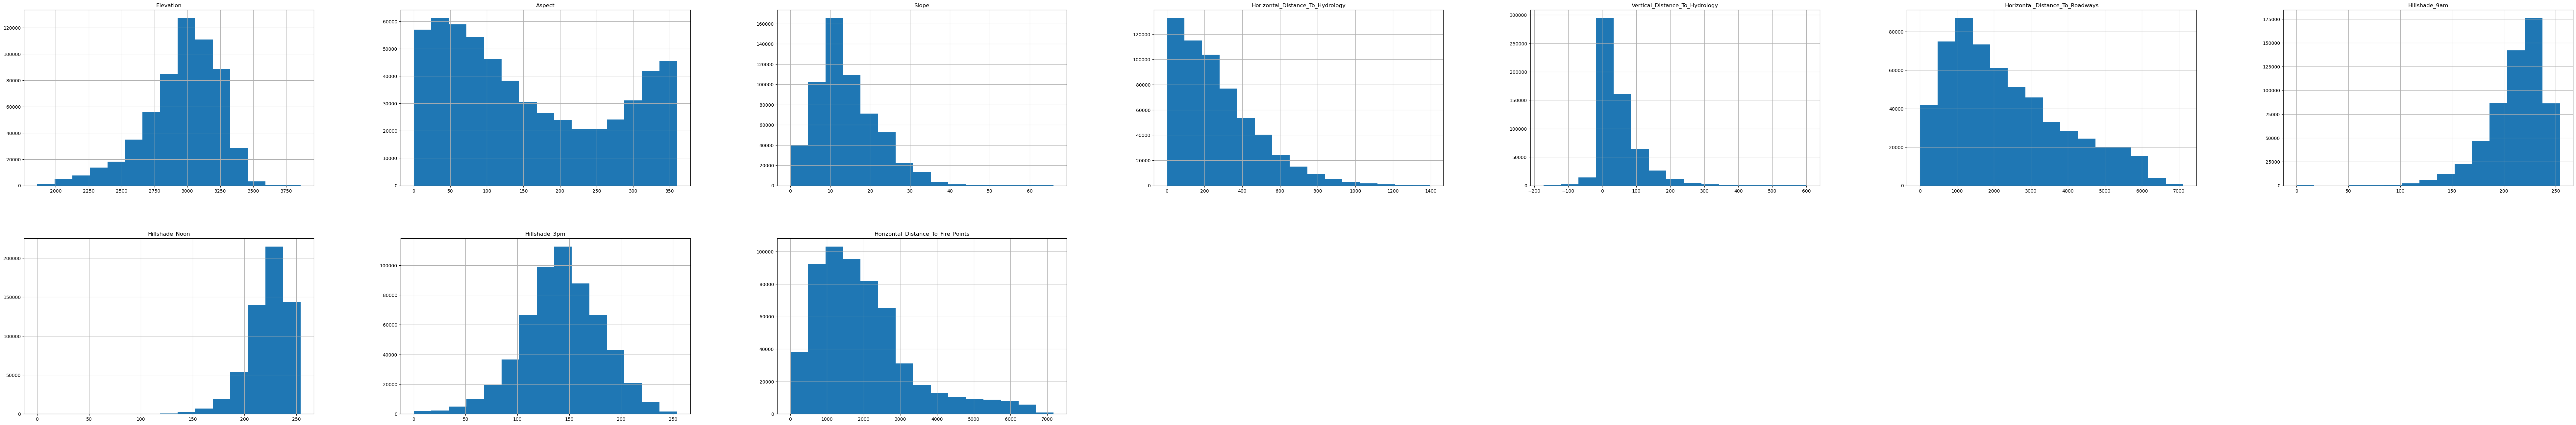

<Figure size 10000x7000 with 0 Axes>

In [29]:
var = test[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points']]

var.hist(bins=15, figsize=(100, 70), layout=(8, 7))

plt.figure(figsize=(100, 70))

**Observations for test data**

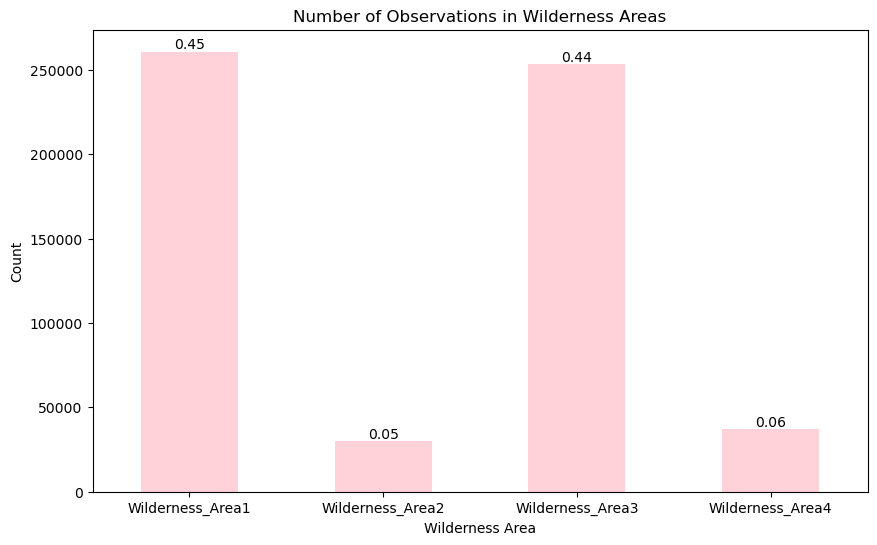

In [34]:
import pandas as pd
import matplotlib.pyplot as plt



wilderness_columns = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']


wilderness_counts = test[wilderness_columns].sum()


wilderness_ratios = wilderness_counts / len(test)


wilderness_df = pd.DataFrame({'Count': wilderness_counts, 'Ratio': wilderness_ratios})


ax = wilderness_df['Count'].plot(kind='bar', color='pink', figsize=(10, 6), alpha=0.7)


for i, ratio in enumerate(wilderness_df['Ratio']):
    ax.text(i, wilderness_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations in Wilderness Areas')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.xticks(rotation=0)  


plt.show()

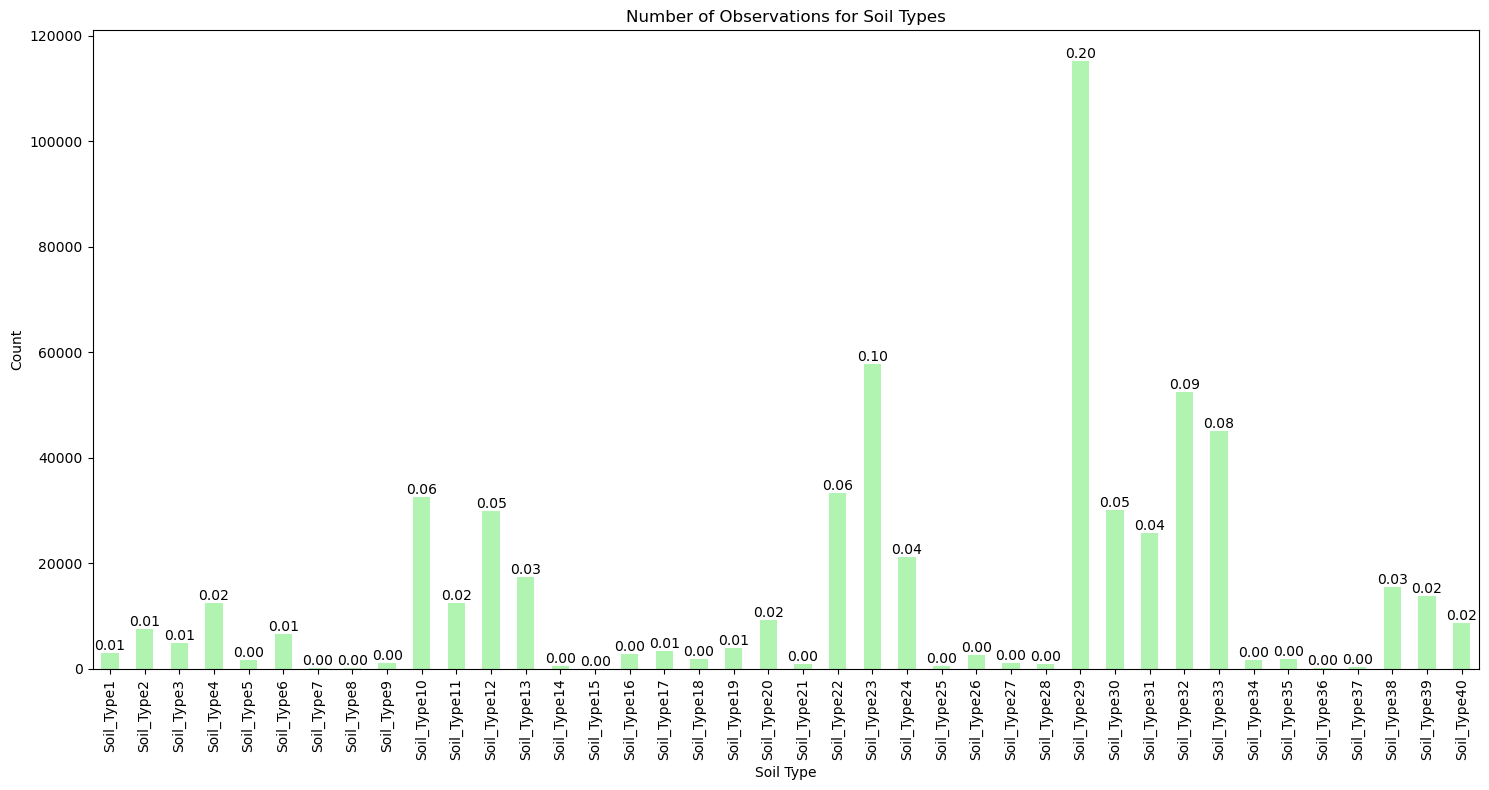

In [35]:
soil_type_columns = [f'Soil_Type{i}' for i in range(1, 41)]


soil_type_counts = test[soil_type_columns].sum()


soil_type_ratios = soil_type_counts / len(test)


soil_type_df = pd.DataFrame({'Count': soil_type_counts, 'Ratio': soil_type_ratios})


ax = soil_type_df['Count'].plot(kind='bar', color='lightgreen', figsize=(15, 8), alpha=0.7)


for i, ratio in enumerate(soil_type_df['Ratio']):
    ax.text(i, soil_type_df['Count'][i], f'{ratio:.2f}', ha='center', va='bottom')


plt.title('Number of Observations for Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.xticks(rotation=90)  


plt.tight_layout()  
plt.show()

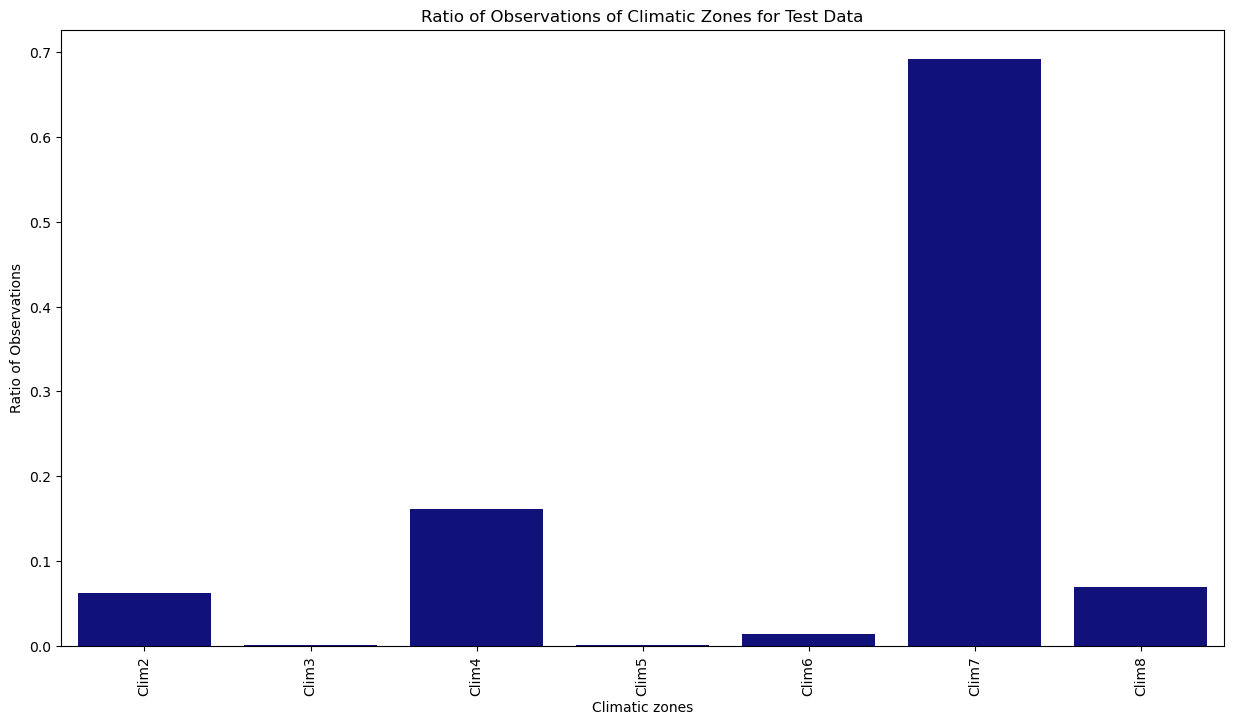

In [36]:
climates_test = climates(test[soil_type_columns], drop_original=True)

# Calculate the sum of each climatic column.
climatic_counts = climates_test.sum()

# Convert accounts into ratios in relation to total observations.
climatic_ratios = climatic_counts / test.shape[0]

# Create a DataFrame for key figures.
climatic_df = pd.DataFrame({'ClimaticZone': climatic_ratios.index, 'Ratio': climatic_ratios.values})

# Draw the ratio graph with seaborn's barplot.
plt.figure(figsize=(15, 8))
sns.barplot(data=climatic_df, x='ClimaticZone', y='Ratio', color='darkblue')
plt.title("Ratio of Observations of Climatic Zones for Test Data")
plt.xlabel("Climatic zones")
plt.ylabel("Ratio of Observations")
plt.xticks(rotation=90)
plt.show()

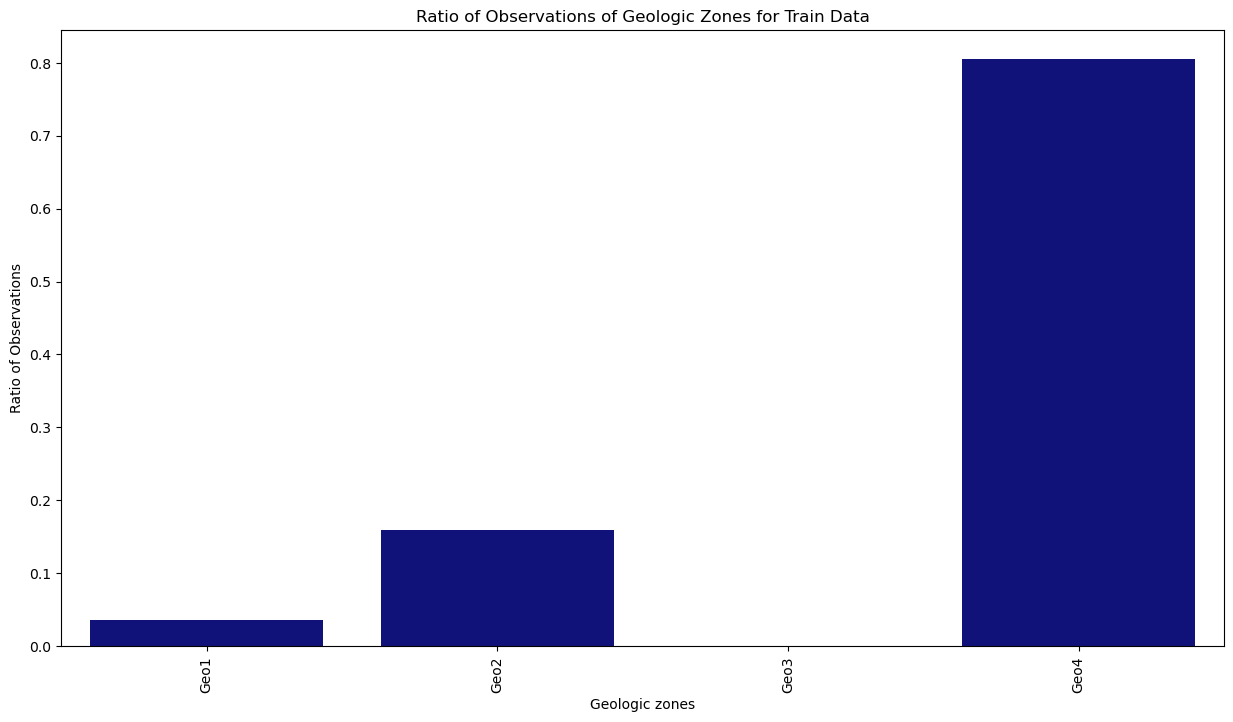

In [38]:
soil_type_columns = [col for col in test.columns if 'Soil_Type' in col]
geologic_zones_test = geologic_zone(test[soil_type_columns], drop_original=True)

# Calculate the sum of each geological column to get the total observations per geological zone
geologic_counts = geologic_zones_test.sum()

# Convert the counts to ratios relative to the total number of observations
geologic_ratios = geologic_counts / test.shape[0]

# Create a DataFrame from the ratios for easier plotting
geologic_df = pd.DataFrame({'GeologicZone': geologic_ratios.index, 'Ratio': geologic_ratios.values})

# Now plot the ratios using seaborn's barplot
plt.figure(figsize=(15, 8))
sns.barplot(data=geologic_df, x='GeologicZone', y='Ratio', color='darkblue')
plt.title("Ratio of Observations of Geologic Zones for Train Data")
plt.xlabel("Geologic zones")
plt.ylabel("Ratio of Observations")
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.show()